# Neural Network for Function Approximation
#### By Godfrey Tshehla

# 1. Introduction

In this tutorial, we will demonstrate how to use TensorFlow to build and train a neural network to approximate the function $ f(x) = x^2 \cdot e^{-x^2} $. This will help you understand the fundamental concepts and workings of neural networks, including forward propagation, backpropagation, and the training process.

We will start by defining the neural network model, followed by preparing and scaling the data, training the model, and visualizing the results. By the end of this tutorial, you will have a solid understanding of how to use TensorFlow to build, train, and evaluate neural networks for function approximation.

#### NB: This tutorial is for educational purposes.

# 2. Neural Network Function

In this section, we will outline the mathematical concepts and structures that underpin using neural networks for function approximation. This understanding will help you grasp how neural networks can learn and approximate complex functions from data.

## Structure of the Neural Network

A neural network designed for function approximation typically consists of three main components:
1. **Input Layer**: Takes the input features of the function to be approximated.
2. **Hidden Layers**: Layers that transform the input data into a higher-dimensional space, enabling the network to capture complex patterns and relationships.
3. **Output Layer**: Produces the approximation of the target function’s output.

### Forward Propagation

In function approximation, forward propagation involves passing the input through the network layers to obtain an output. Each layer performs a linear transformation followed by a non-linear activation function.

For a single neuron, the output $h$ is computed as:
$$
h = \sigma(W \cdot x + b)
$$
where:
- $W$ is the weight matrix,
- $x$ is the input vector,
- $b$ is the bias term,
- $\sigma$ is the activation function (e.g., ReLU, sigmoid).

For a layer with multiple neurons, the output $\mathbf{h}$ is given by:
$$
\mathbf{h} = \sigma(W \cdot \mathbf{x} + \mathbf{b})
$$
where $W$ is a matrix of weights, and $\mathbf{x}$ is a vector of inputs.

### Activation Function

The activation function introduces non-linearity into the network, allowing it to approximate complex functions. Common activation functions include:

- **Sigmoid Function**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
- **ReLU (Rectified Linear Unit)**:
$$
\text{ReLU}(z) = \max(0, z)
$$

### Loss Function

The loss function measures the discrepancy between the predicted output and the true target values. For function approximation, we often use Mean Squared Error (MSE) to quantify this difference:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (f_i - \hat{f}_i)^2
$$
where:
- $f_i$ is the true value,
- $\hat{f}_i$ is the predicted value,
- $n$ is the number of data points.

### Backpropagation

Backpropagation is the algorithm used to update the weights and biases to minimize the loss. It involves computing the gradient of the loss function with respect to each parameter and adjusting the parameters in the opposite direction of the gradient. The gradient update rule for a weight $W$ is:
$$
W \leftarrow W - \eta \frac{\partial \text{Loss}}{\partial W}
$$
where:
- $\eta$ is the learning rate,
- $\frac{\partial \text{Loss}}{\partial W}$ is the gradient of the loss with respect to the weight.

### Iterative Learning

Through iterative forward propagation and backpropagation over multiple epochs, the neural network adjusts its weights and biases to minimize the loss function. This process enables the network to learn and approximate the underlying function effectively.

# 3. Neural Network in Tensorflow

In [8]:
# Import the required libraries and stuff!
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Let's define the neural network model
neural_network = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
neural_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                100       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


# 3. Results: learning $f(x) = x^2 e^{-x^2}$

## 3.1 Training the NN

In [10]:
# Create dataset
x = np.linspace(-2, 2, 20000).reshape(-1, 1) # we create 20,000 samples
y = x**2 * np.exp(-x**2)

# Normalize the data using MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [11]:
# Train the model
history = neural_network.fit(x_scaled, y_scaled, epochs=100, verbose=0)

# Test the neural network
output_scaled = neural_network.predict(x_scaled)

# Inverse transform the predictions
output = scaler_y.inverse_transform(output_scaled)

625/625 [==============================] - 0s 672us/step


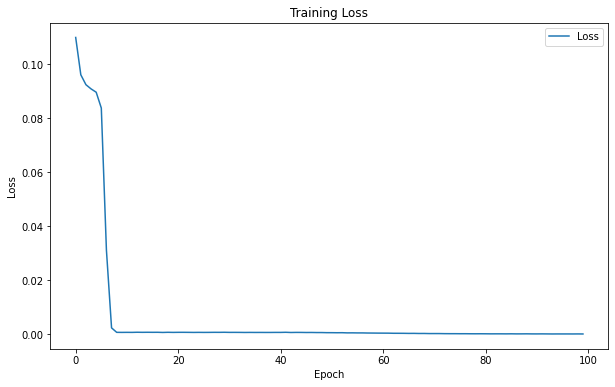

Predicted output:
[[0.0733325 ]
 [0.07334132]
 [0.07335013]
 ...
 [0.07230376]
 [0.07224535]
 [0.0721871 ]]


In [12]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Predicted output:")
print(output)

## 3.2 The prediction

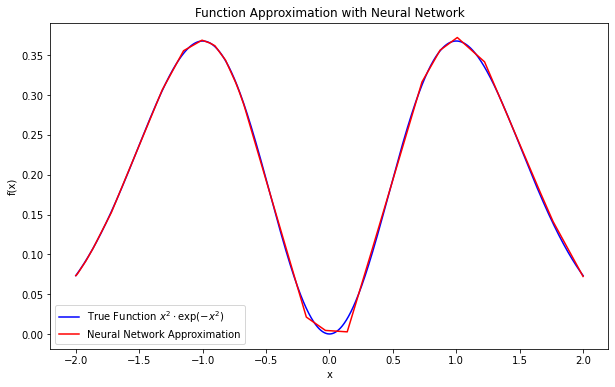

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True Function $x^2 \cdot \exp(-x^2)$', color='blue')
plt.plot(x, output, label='Neural Network Approximation', color='red')
plt.title('Function Approximation with Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

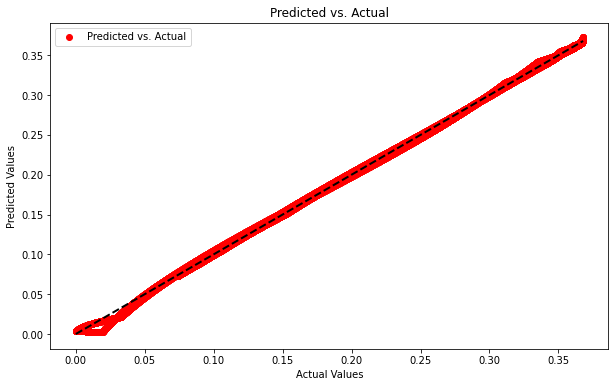

Mean Squared Error (MSE): 8.972333200009079e-06
Coefficient of Determination $R^2$: 0.9993438000047016


In [14]:
# Let's calculate MSE and R^2
mse = mean_squared_error(y, output)
r2 = r2_score(y, output)

plt.figure(figsize=(10, 6))
plt.scatter(y, output, color='red', label='Predicted vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination $R^2$: {r2}")

# 4. Conclusion

There's no conclusion.

# 5. References

Here are some resources that provide more information about neural networks and function approximation:

a. **Deep Learning by Ian Goodfellow, Yoshua Bengio, and Aaron Courville**:
   - This comprehensive book covers the fundamentals and advanced topics in deep learning. It provides insights into various neural network architectures, including feed-forward networks and recurrent networks.
   - [Deep Learning Book](https://www.deeplearningbook.org/)

b. **Neural Networks and Deep Learning by Michael Nielsen**:
   - An excellent online book that provides an intuitive introduction to neural networks and deep learning, with a focus on understanding the concepts through visualizations and simple code examples.
   - [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)

c. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron**:
   - A practical guide to machine learning and deep learning using Python libraries. This book includes hands-on examples and exercises that help reinforce the concepts.
   - [Hands-On Machine Learning Book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

d. **Coursera: Deep Learning Specialization by Andrew Ng**:
   - A series of online courses on Coursera that cover deep learning topics, including neural networks, convolutional networks, sequence models, and more. Taught by Andrew Ng, one of the pioneers in the field of machine learning and AI.
   - [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)

e. **NumPy Documentation**:
   - The official documentation for NumPy, which is a fundamental library for scientific computing in Python. It provides extensive information on the library's functions and features.
   - [NumPy Documentation](https://numpy.org/doc/)